In [1]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from pyts import datasets
from tools.tools_ssts import load_config, get_Docs
from tools.tools import BofShapesModel, KNNEuclid, pattern_relevance, BoWDistributionRepresentation, BOWDistributionSignal

In [116]:
sns.set()

dataset_lst = datasets.ucr_dataset_list()

pk_size = 10
thr = 0.05
win_len = 30
config = load_config(win_len=win_len, d1_thr=thr, pk_size=pk_size, groups="part")
print(config)
data = datasets.fetch_ucr_dataset("Trace", use_cache=True, data_home=None, return_X_y=False)
X_train = data["data_train"]
y_train = data["target_train"]
X_test = data["data_test"]
y_test = data["target_test"]

    Group Pre-Processing  Connotation String          Symbolic Search  \
0       0     S win_size              D1 thr                       p+   
1       0     S win_size              D1 thr                 z{size,}   
2       0     S win_size              D1 thr                       n+   
3       1     S win_size              D1 thr   n+z{size,}n+z{,size}p+   
4       1     S win_size              D1 thr   p+z{size,}p+z{,size}n+   
5       1     S win_size              D1 thr  n+z{,size}p+z{size,}+p+   
6       1     S win_size              D1 thr   p+z{,size}n+z{size,}n+   
7       2     S win_size              D1 thr             p+z{,size}n+   
8       2     S win_size              D1 thr             n+z{,size}p+   
9       2     S win_size              D1 thr             n+z{size,}p+   
10      2     S win_size              D1 thr             p+z{size,}n+   
11      3     S win_size        ADa 0.66 thr                       r+   
12      3     S win_size        ADa 0.66 thr       

In [117]:
docs_train, docs_test, docs_train_matches, docs_test_matches = get_Docs(X_train, X_test, config)

In [118]:
config_bow = {"ngram":(1,2), "mindf":0, "maxdf":0.95}

In [119]:
y_pred_svm_tfidf, model_tfidf_svm, test_vecs = BofShapesModel(docs_train, y_train, docs_test, y_test, config_bow, "SVM", "TFIDF")
y_pred_eucl = KNNEuclid(X_train, y_train, X_test, y_test)

In [120]:
y_pred_svm_tfidf

array([3, 1, 3, 2, 1, 3, 2, 2, 2, 4, 3, 2, 3, 3, 3, 4, 2, 3, 1, 1, 3, 4,
       4, 1, 2, 3, 3, 4, 3, 4, 3, 2, 2, 2, 1, 4, 3, 1, 2, 4, 3, 4, 2, 2,
       4, 2, 1, 4, 4, 3, 2, 4, 2, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 2, 4, 1,
       2, 1, 2, 1, 1, 2, 3, 4, 1, 2, 2, 4, 3, 2, 2, 1, 4, 1, 2, 2, 4, 1,
       1, 1, 3, 1, 1, 2, 3, 3, 2, 2, 3, 4], dtype=int64)

In [121]:
y_pred_eucl

array([4, 1, 4, 2, 1, 4, 2, 2, 1, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4,
       4, 2, 2, 4, 4, 4, 3, 4, 3, 2, 2, 2, 1, 4, 3, 2, 1, 4, 4, 4, 2, 2,
       4, 2, 1, 4, 4, 4, 2, 4, 1, 2, 4, 2, 4, 1, 3, 4, 4, 1, 3, 2, 4, 1,
       2, 1, 2, 1, 2, 1, 4, 4, 1, 1, 2, 4, 3, 2, 2, 2, 4, 2, 2, 2, 4, 1,
       1, 1, 4, 1, 1, 2, 4, 3, 2, 2, 4, 4], dtype=int64)

In [122]:
y_test

array([3, 1, 3, 2, 1, 3, 2, 2, 2, 4, 3, 2, 3, 3, 3, 4, 2, 3, 1, 1, 3, 4,
       4, 1, 2, 3, 3, 4, 3, 4, 3, 2, 2, 2, 1, 4, 3, 1, 2, 4, 3, 4, 2, 2,
       4, 2, 1, 4, 4, 3, 2, 4, 2, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 2, 4, 1,
       2, 1, 2, 1, 1, 2, 3, 4, 1, 2, 2, 4, 3, 2, 2, 1, 4, 1, 2, 2, 4, 1,
       1, 1, 3, 1, 1, 2, 3, 3, 2, 2, 3, 4], dtype=int64)

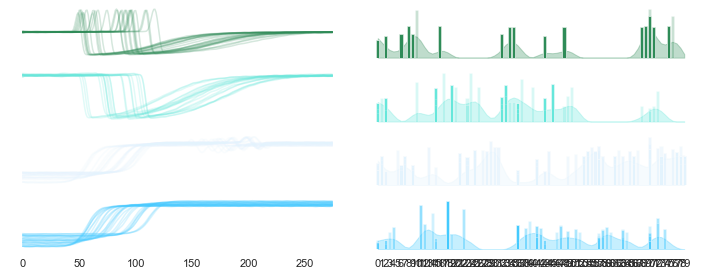

In [15]:
BoWDistributionRepresentation(X_train, docs_train, model_tfidf_svm, y_train, )

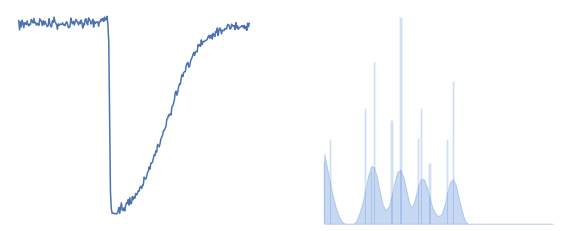

In [169]:
color = "#4881d6ff"
BOWDistributionSignal(X_train[1], [docs_train[1]], model_tfidf_svm, color, name = "class2")

In [21]:
sig_doc = [docs_train[2]]

In [29]:
import pandas as pd
sig_vec = pd.DataFrame(model_tfidf_svm.transform(sig_doc).toarray(), columns=model_tfidf_svm.get_feature_names())


,Fall,Fall Rise,Fall Straight,Fall nPlt,Fall pPlt,Fall pPltPk,Peak,Peak Valley,Peak nPlt,Rise Fall,...,sRise,sRise hFall,sRise hRise,sRise sFall,sRise sFhR,sRise sRhF,sRise sRise,sRise sRsF,sRsF,sRsF sFsR
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
from scipy.spatial.distance import pdist, squareform

X_sig = X_test[23:35, :]
X_doc = [docs_test[23:35]]
X_vec = [pd.DataFrame(model_tfidf_svm.transform(s_doc).toarray(), columns=model_tfidf_svm.get_feature_names()) for s_doc in X_doc]

X_dist = pdist(X_vec[0], "cosine")
X_euc_dist = pdist(X_sig, "euclidean")
print(squareform(X_dist))
print(squareform(X_euc_dist))

[[0.         0.77962456 0.77323515 0.77323515 0.9170536  0.77323515
  0.9170536  0.77323515 0.77962456 0.9277785  0.9277785  0.        ]
 [0.77962456 0.         0.92140693 0.92140693 0.8630135  0.92140693
  0.8630135  0.92140693 0.         0.6245818  0.6245818  0.77962456]
 [0.77323515 0.92140693 0.         0.         0.88348655 0.
  0.88348655 0.         0.92140693 0.83746233 0.83746233 0.77323515]
 [0.77323515 0.92140693 0.         0.         0.88348655 0.
  0.88348655 0.         0.92140693 0.83746233 0.83746233 0.77323515]
 [0.9170536  0.8630135  0.88348655 0.88348655 0.         0.88348655
  0.         0.88348655 0.8630135  0.9289082  0.9289082  0.9170536 ]
 [0.77323515 0.92140693 0.         0.         0.88348655 0.
  0.88348655 0.         0.92140693 0.83746233 0.83746233 0.77323515]
 [0.9170536  0.8630135  0.88348655 0.88348655 0.         0.88348655
  0.         0.88348655 0.8630135  0.9289082  0.9289082  0.9170536 ]
 [0.77323515 0.92140693 0.         0.         0.88348655 0.
  0.8

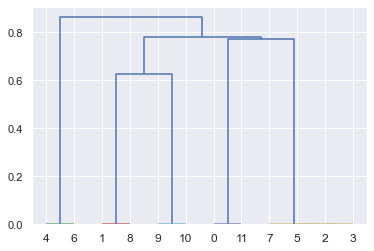

In [152]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(X_dist, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)

plt.savefig("dendogram_hearts_class.svg")

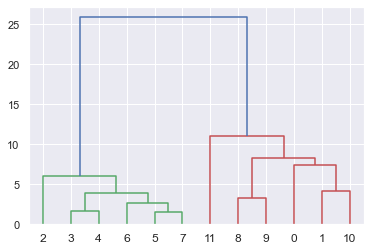

In [153]:
Z = hierarchy.linkage(X_euc_dist, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)
plt.savefig("dendogram_euclidean_class.svg")

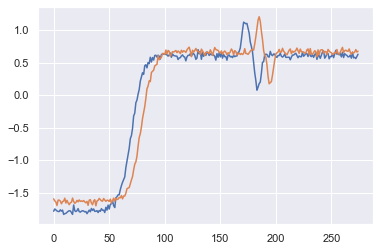

In [163]:
plt.plot(X_sig[7])
plt.plot(X_sig[3])
plt.show()

In [176]:
X_doc = [docs_test[0:10]]
X_vec = [pd.DataFrame(model_tfidf_svm.transform(s_doc).toarray(), columns=model_tfidf_svm.get_feature_names()) for s_doc in X_doc]

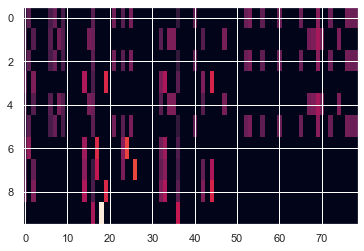

In [177]:
plt.imshow(X_vec[0].values, aspect="auto")

(10, 79)


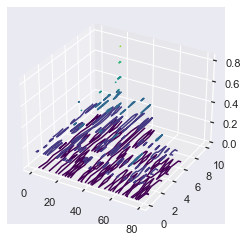

In [225]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
vlas = X_vec[0].values
print(np.shape(X_vec[0].values))
x = np.linspace(0, np.shape(vlas)[0], np.shape(vlas)[0])
y = np.linspace(0, np.shape(vlas)[1], np.shape(vlas)[1])
X, Y = np.meshgrid(x, y)
ax.contour3D(Y, X, np.transpose(vlas),  cmap='viridis')